<a href="https://colab.research.google.com/github/dancankimutai/basic-ml-course/blob/tree/06_Tree/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6: Decision tree & Random forest

Good news! We don't have to implement anything from scratch today!

To make things easier, make a copy of this notebook and do the exercise in there.

Implement everywhere that has ...

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the data
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names
print(X.shape, y.shape)

(20640, 8) (20640,)


## Task 1 (1pt)

* Split the data into a training and validation set with 80%/20% distribution
* Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn for this. Remember to set the `random_state` parameter to 0 




In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.2, random_state=0)

## Task 2 (1 pt)
Train a decision tree model to predict house price. Remember to use the training set `X_train` to train the model
* Train a model with `max_depth=1`. Remember to set the `random_state=0` 
* Visualize the tree you just trained. You can refer to the code from the lecture video. 
* Which feature was used to split the data (choose 1 and write you answer in a comment below the code
    * `MedInc`
    * `AveRooms`
    * `AveBedrms`
    * `HouseAge`

In [6]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# for visualization
import graphviz


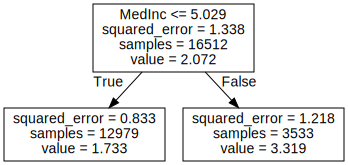

In [13]:
# Initialize the decision tree class and train the decision tree
tree = DecisionTreeRegressor(max_depth=1, random_state=0)
tree.fit(X_train, y_train)

# Visualize the tree
dot = export_graphviz(tree,feature_names=feature_names,
                                class_names=data.target_names)
graph = graphviz.Source(dot)
graph

## Task 3 (2pt)
* Train a decision tree with `max_depth=3`.
* Don't forget `random_state=0`
* Print the mean square error on the validation set.
* What is the mean square error you just calculate.
 Write you answer in the comment below the code.


In [15]:
from sklearn.metrics import mean_squared_error
# Train the model
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
# Print the mean squared error
print(mse)

# What's the mean squared error you just calculate: 0.6533119456700849

0.6533119456700849


## Task 4 (2pt)
Tune the `max_depth` parameter of the model
* Try different values for `max_depth`: `[5, 6, 7, 8, 9, 10, 11, 12]`
* Don't forget `random_state=0`
* Print out the mean square error for each value of `max_depth`
* What is the best value for `max_depth`? Write you answer in the comment below the code.

In [16]:
# Your code here
for depth in [5, 6, 7, 8, 9, 10, 11, 12]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_valid)

    # mean squared error on the validation set
    mse = mean_squared_error(y_valid, y_pred)
    print("max_depth =", depth, ": Mean squared error on validation set:", mse)

# What's the best max_depth: 9

max_depth = 5 : Mean squared error on validation set: 0.5401962207714344
max_depth = 6 : Mean squared error on validation set: 0.4984109265539033
max_depth = 7 : Mean squared error on validation set: 0.4596987909870867
max_depth = 8 : Mean squared error on validation set: 0.44604575226916726
max_depth = 9 : Mean squared error on validation set: 0.4313636207268005
max_depth = 10 : Mean squared error on validation set: 0.4470239650247865
max_depth = 11 : Mean squared error on validation set: 0.444291361570811
max_depth = 12 : Mean squared error on validation set: 0.45049079652055624


## Task 5 (1pt)
Let's switch to random forest

Train a random forest model with
* n_estimators=20
* random_state=0

What is the mean square error on the validation set? Write you answer in the comment below the code

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Your code here
model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print("Mean squared error on validation set:", mse)

#The mean square error on the validation set 0.26946775214546204

Mean squared error on validation set: 0.26946775214546204


## Task 6 (2pt)
Tune different hyperparameter of random forest
* `random_state=0`
* Try different values for `max_features`: `[0.5, 'sqrt', 'log2']`
* For each of these values for `max_features`, try different values of `n_estimators` from 10 to 100 (with step size 10): i.e `[10, 20, 30, ...]` 
* Optionally set `n_jobs=-1` to train faster

In [20]:
# Your code here 
random_state = 0


for max_features in [0.5, "sqrt", "log2"]:
    # Loop over different values of n_estimators
    for n_estimators in range(10, 100, 10):
        # Train model with max_features and n_estimators
        model = RandomForestRegressor(max_features=max_features, n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
        model.fit(X_train, y_train)

        # Predict the labels on the validation set
        y_pred = model.predict(X_valid)

        # MSE on the validation set
        mse = mean_squared_error(y_valid, y_pred)
        print("max_features =", max_features, "n_estimators =", n_estimators, ": Mean squared error on validation set:", mse)

max_features = 0.5 n_estimators = 10 : Mean squared error on validation set: 0.25966064932921845
max_features = 0.5 n_estimators = 20 : Mean squared error on validation set: 0.24784799447654277
max_features = 0.5 n_estimators = 30 : Mean squared error on validation set: 0.24380492287185682
max_features = 0.5 n_estimators = 40 : Mean squared error on validation set: 0.24228319218753216
max_features = 0.5 n_estimators = 50 : Mean squared error on validation set: 0.2438575547463115
max_features = 0.5 n_estimators = 60 : Mean squared error on validation set: 0.24374536907814756
max_features = 0.5 n_estimators = 70 : Mean squared error on validation set: 0.24391113043279594
max_features = 0.5 n_estimators = 80 : Mean squared error on validation set: 0.2430250307468788
max_features = 0.5 n_estimators = 90 : Mean squared error on validation set: 0.24359083948811636
max_features = sqrt n_estimators = 10 : Mean squared error on validation set: 0.2687218406388496
max_features = sqrt n_estimators

## Task 7 (1pt)

Extract feature importance of the model
Train a random forest model with:
* `n_estimators=10`
* `max_dept=15`
* `random_state=0`

Get the feature importance attribute of the model. You can use the `feature_importances_` attibute 

What is the most important feature? write your answer in a comment in the code cell below.

In [21]:
# Train your model
model = RandomForestRegressor(n_estimators=10, max_depth=15, random_state=0)
model.fit(X_train, y_train)


# Get feature importance
feature_importances = model.feature_importances_

# Print the feature importance
print(np.round(feature_importances, 3))

[0.541 0.054 0.045 0.029 0.031 0.135 0.083 0.082]


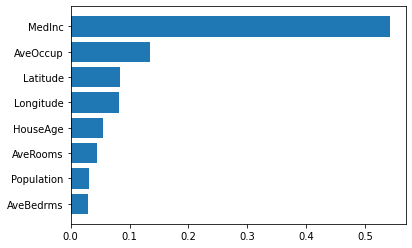

In [22]:
df_importances = pd.DataFrame()
df_importances['feature'] = feature_names
df_importances['importance'] = feature_importances
df_importances.sort_values(by='importance', inplace=True)

plt.barh(range(df_importances.shape[0]), df_importances.importance)
plt.yticks(range(df_importances.shape[0]), df_importances.feature)

plt.show()

#The most important feature: 
